In [1]:
import os
import pandas as pd
import re

def read_and_concatenate_files_with_labels_and_user(folder_paths,
     column_names):
    # Initialize an empty DataFrame
    result_df = pd.DataFrame(columns=column_names + ['Label', 
                    'User'])

    # Iterate through folder paths
    for folder_label, folder_path in zip(['Reading',
                     'Speaking', 'Watching'], 
                     folder_paths):
        # Initialize an empty list to store DataFrames
        dfs = []

        # Get a sorted list of files in the folder
        files_to_process = sorted([file_name for 
    file_name in os.listdir(folder_path) 
    if file_name.endswith('.csv')])

        # Iterate through sorted files in the folder
        for file_name in files_to_process:
            file_path = os.path.join(folder_path, file_name)
            
            # Read the CSV file without column names and concatenate rows
            df = pd.read_csv(file_path, header=None, 
                             names=column_names)
            
            # Extract numerical user information from 
            #the file name using regular expression
            user_match = re.search(r'(\d+)', file_name)
            user_info = int(user_match.group(1)) if \
            user_match else None
            
            # Add 'Label' and 'User' columns
            df['Label'] = folder_label
            df['User'] = user_info
            dfs.append(df)

            # Print statement for debugging
            #print(f"Processed file: {file_name}, 
            #User: {user_info}, Label: {folder_label}")

        # Concatenate the list of DataFrames vertically
        result_df = pd.concat([result_df, pd.concat(dfs, 
                    ignore_index=True)], ignore_index=True)

    return result_df

# Example usage:
folder_paths = ['Data/Reading', 
    'Data/Speaking', 'Data/Watching']
column_names = ['EEG1', 'EEG2', 'Acc_X', 'Acc_Y', 'Acc_Z']

result_dataframe = read_and_concatenate_files_with_labels_and_user(folder_paths,
                 column_names)

# Print the unique values in the "User" column
#print(result_dataframe['User'].unique())

# Display the resulting DataFrame
print(result_dataframe)


              EEG1        EEG2       Acc_X       Acc_Y       Acc_Z     Label  \
0       842.229919  847.164856 -656.251038  789.063721  136.718964   Reading   
1       845.519897  853.744812 -660.157288  792.969971  136.718964   Reading   
2       847.164856  858.679748 -656.251038  792.969971  136.718964   Reading   
3       843.874939  852.099793 -656.251038  792.969971  140.625214   Reading   
4       847.164856  857.034729 -656.251038  792.969971  136.718964   Reading   
...            ...         ...         ...         ...         ...       ...   
104475  847.164856  857.034729 -703.126099  750.001160  136.718964  Watching   
104476  875.129517  837.294983 -703.126099  750.001160  136.718964  Watching   
104477  852.099793  837.294983 -703.126099  750.001160  136.718964  Watching   
104478  832.360046  870.194580 -707.032349  746.094910  132.812714  Watching   
104479  843.874939  843.874939 -703.126099  746.094910  136.718964  Watching   

       User  
0         1  
1         1

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

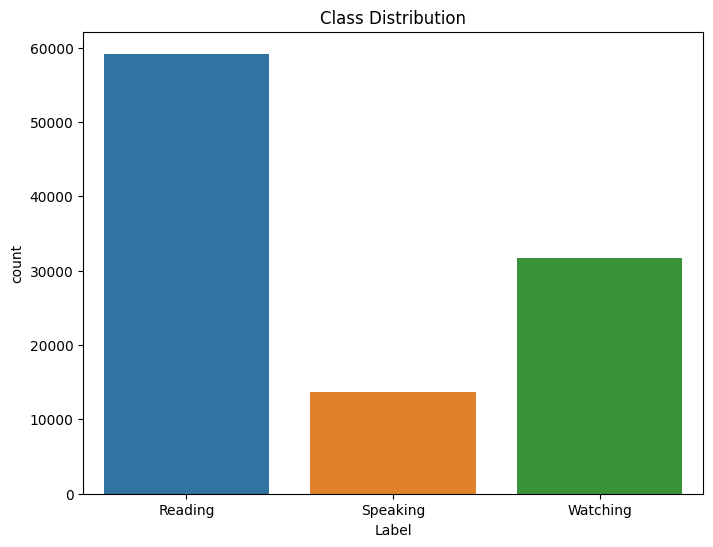

In [4]:
# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=result_dataframe)
plt.title('Class Distribution')
plt.show()


In [5]:
# Display summary statistics of features
print(result_dataframe[['EEG1', 'EEG2', 'Acc_X', 'Acc_Y', 'Acc_Z']].describe())


                EEG1           EEG2          Acc_X          Acc_Y  \
count  104480.000000  104480.000000  104480.000000  104480.000000   
mean      841.854178     841.007252    -373.792855     897.376426   
std        17.578842      23.306196     223.622159      99.597747   
min       598.772827     490.204132    -804.688782     582.032166   
25%       835.650024     832.360046    -562.500854     820.313782   
50%       842.229919     842.229919    -363.281830     933.595215   
75%       848.809875     852.099793    -164.062759     984.376526   
max       950.798645    1064.302246     285.156708    1062.501709   

               Acc_Z  
count  104480.000000  
mean      228.214339  
std        90.653480  
min      -183.594040  
25%       164.062759  
50%       222.656601  
75%       285.156708  
max       753.907410  


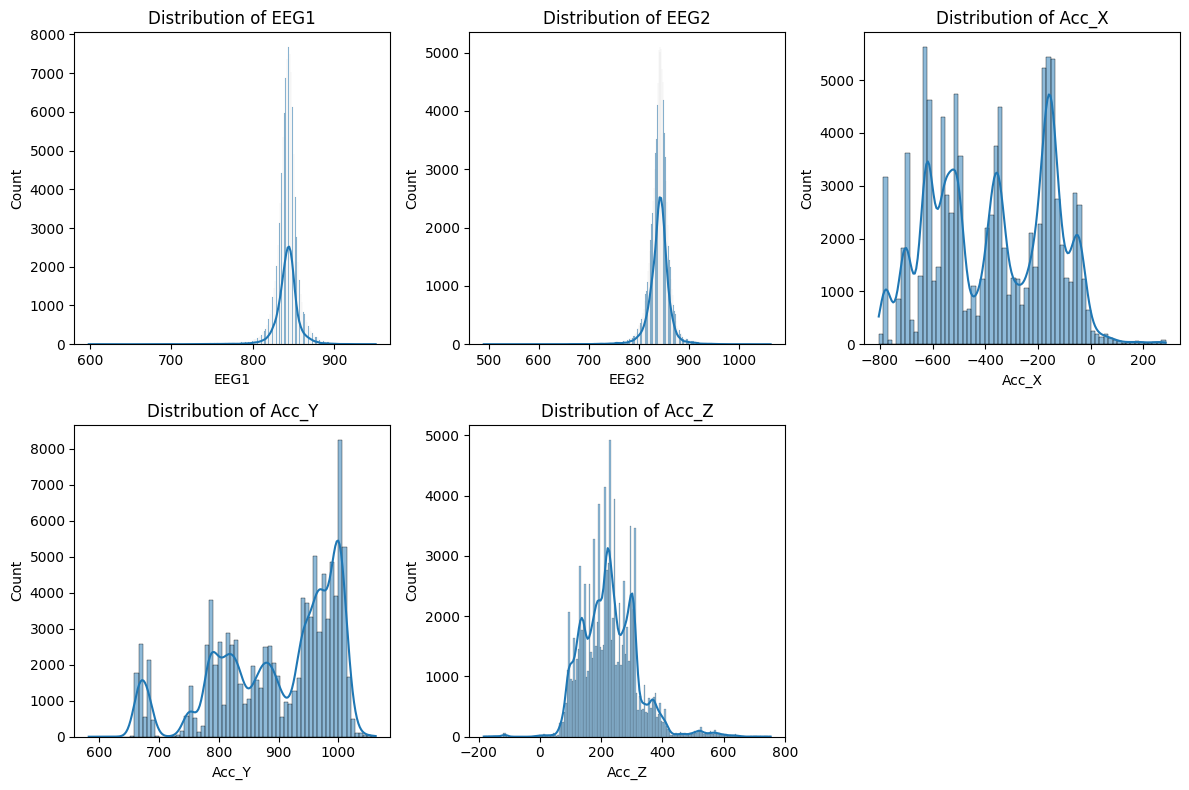

In [6]:
# Plot feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['EEG1', 'EEG2', 'Acc_X', 'Acc_Y', 'Acc_Z']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(result_dataframe[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


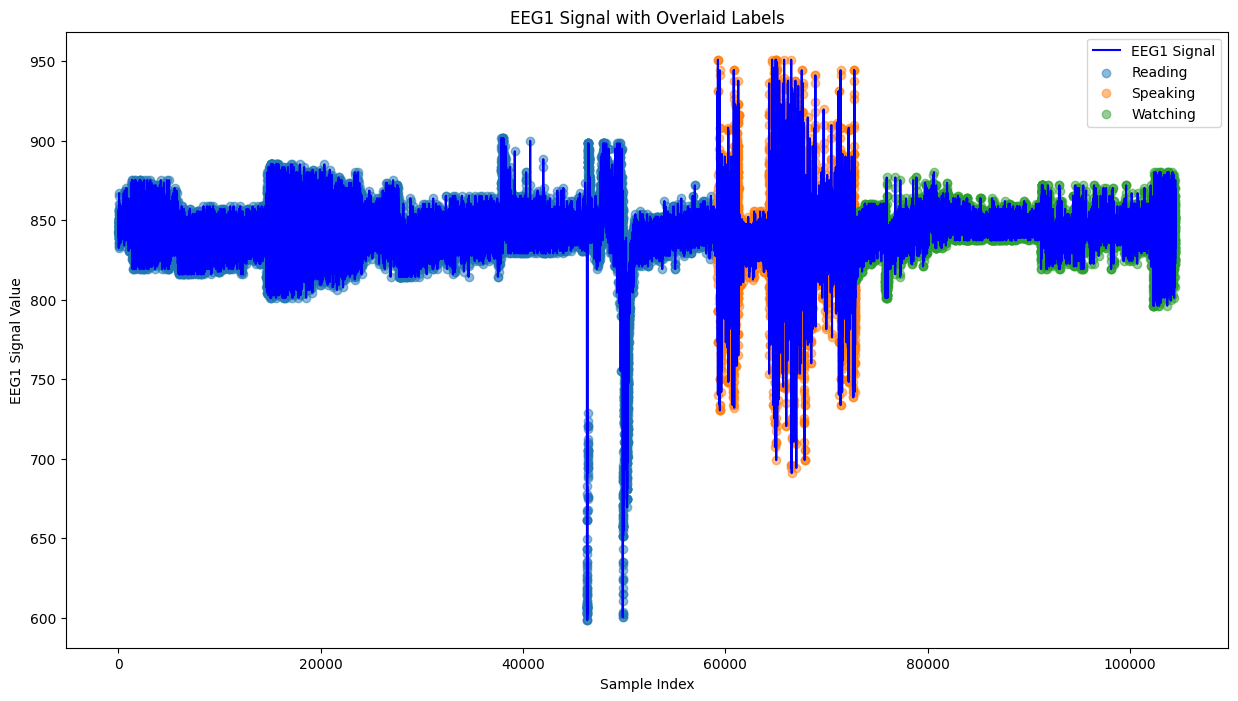

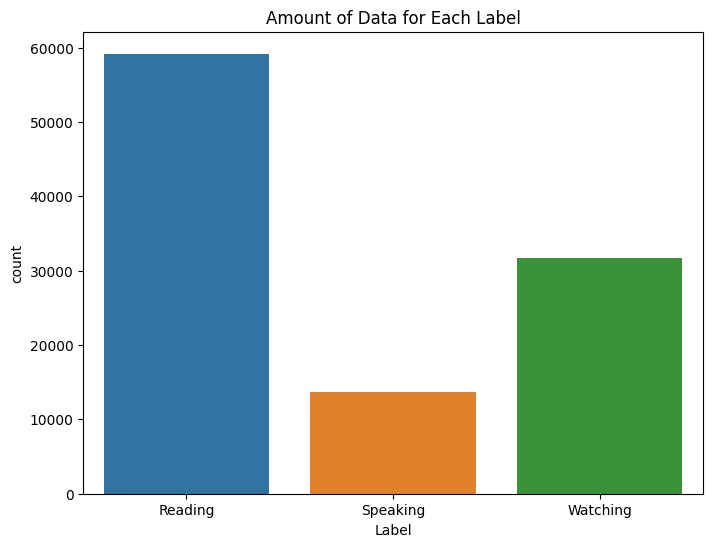

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select EEG1 signals and corresponding labels
eeg1_signals = result_dataframe['EEG1']
labels = result_dataframe['Label']

# Plot EEG1 signals with overlaid labels
plt.figure(figsize=(15, 8))
plt.plot(eeg1_signals, label='EEG1 Signal', color='blue')

# Overlay labels on the signals
for label in labels.unique():
    label_indices = labels[labels == label].index
    plt.scatter(label_indices, eeg1_signals.iloc[label_indices], label=label, alpha=0.5)

plt.title('EEG1 Signal with Overlaid Labels')
plt.xlabel('Sample Index')
plt.ylabel('EEG1 Signal Value')
plt.legend()
plt.show()

# Plot the amount of data for each label
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=result_dataframe)
plt.title('Amount of Data for Each Label')
plt.show()


In [16]:
import numpy as np
EE1 = result_dataframe['EEG1'].values
EE1f = np.fft.fft(EE1)

In [18]:
N  = len(EE1f)
mu = np.arange(N) * 2 * np.pi / N

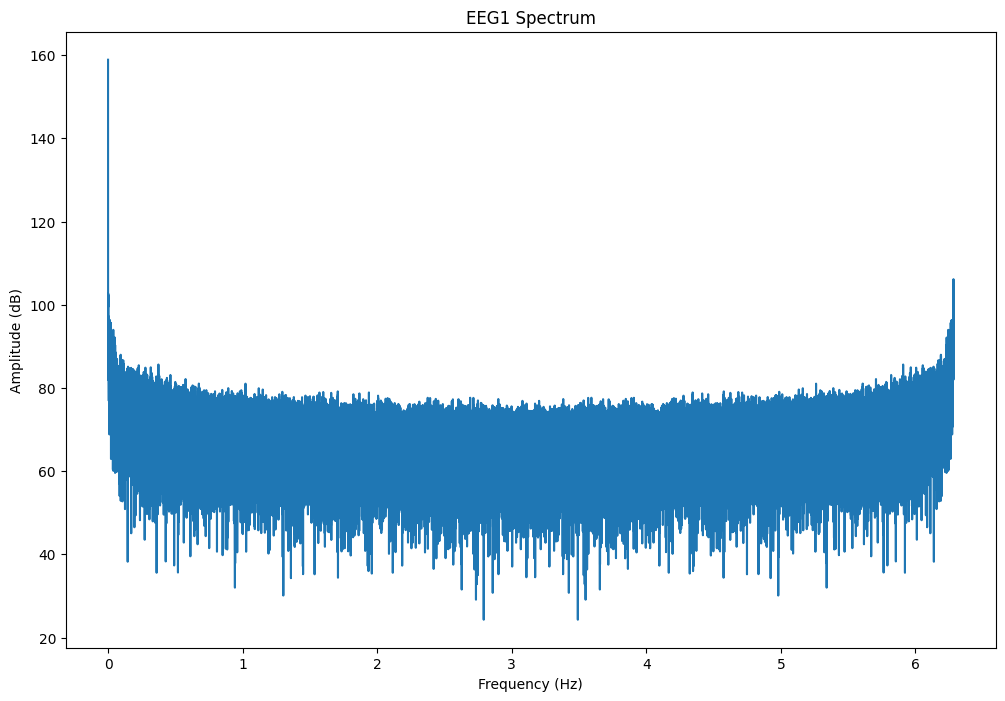

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(mu, 20 * np.log10(np.abs(EE1f)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('EEG1 Spectrum')
plt.show()

